In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('data/car price.csv', header = 0 )

In [4]:
df.head()

,Id,Manufacturer,Model,Prod_Year,Category,Leather_Interioe,Fuel_Type,Engine Volume,Kilometers_Driven,Gear_Box_Type,Drive_Wheel,Selling_Date,Wheel,Color,Airbags,Price
0,45624039,FORD,Mustang,2016,Cabriolet,Yes,Petrol,2.3 Turbo,75000.0,Tiptronic,Rear,02-03-2023,Left wheel,Silver,6.0,423370
1,45766794,MITSUBISHI,Pajero,1997,Jeep,No,Petrol,2.4,142000.0,Automatic,4x4,02-03-2023,Left wheel,Blue,6.0,156810
2,45709646,TOYOTA,RAV 4,2001,Jeep,No,Petrol,2,91000.0,Automatic,4x4,02-03-2023,Right-hand drive,Silver,4.0,108200
3,45816588,SUZUKI,Grand Vitara,2008,Jeep,No,Petrol,1.6,98000.0,Automatic,4x4,02-03-2023,Left wheel,Black,12.0,156810
4,45759758,MITSUBISHI,Pajero Mini,2006,Jeep,No,Petrol,0.7,314000.0,Manual,4x4,02-03-2023,Right-hand drive,Silver,2.0,43910


In [5]:
df.shape

(4819, 16)

In [6]:
df.describe()

,Id,Prod_Year,Kilometers_Driven,Airbags,Price
count,4.819000e+03,4819.00000,4.733000e+03,4650.000000,4.819000e+03
mean,4.562941e+07,2011.30110,1.708417e+06,6.772688,2.181001e+05
std,6.639721e+05,5.43882,5.107095e+07,3.912210,1.911478e+05
min,2.813594e+07,1943.00000,1.600000e+03,0.000000,2.038000e+04
25%,4.572981e+07,2010.00000,7.267800e+04,4.000000,1.003600e+05
50%,4.577619e+07,2012.00000,1.245090e+05,6.000000,1.724900e+05
75%,4.580211e+07,2015.00000,1.840000e+05,12.000000,2.728400e+05
max,4.581665e+07,2020.00000,2.147484e+09,16.000000,2.885210e+06


In [7]:
df.describe(include='O')

,Manufacturer,Model,Category,Leather_Interioe,Fuel_Type,Engine Volume,Gear_Box_Type,Drive_Wheel,Selling_Date,Wheel,Color
count,4819,4819,4819,4819,4819,4819,4819,4819,4819,4819,4819
unique,51,682,4,2,4,86,3,3,3,2,16
top,HYUNDAI,Sonata,Sedan,Yes,Petrol,2,Automatic,Front,04-05-2023,Left wheel,Black
freq,1292,403,2820,3734,2665,1256,3365,3214,2594,4575,1318


In [ ]:
sns.jointplot(x='Kilometers_Driven', y = 'Price', data = df)

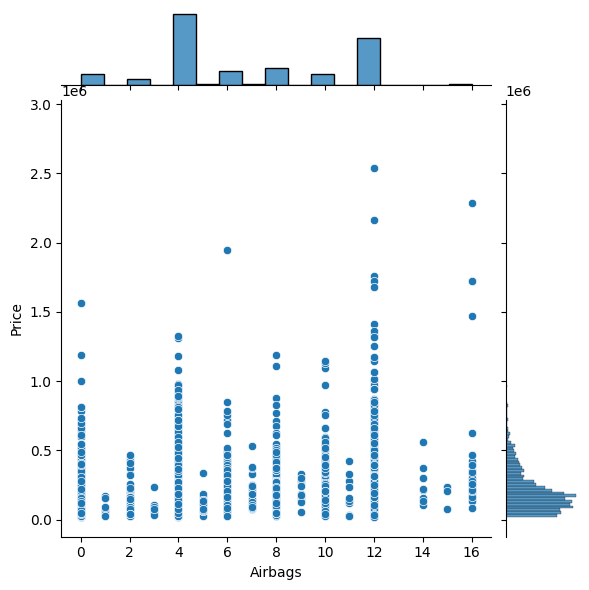

In [8]:
sns.jointplot(x='Airbags', y = 'Price', data = df)

<Axes: xlabel='Leather_Interioe', ylabel='count'>

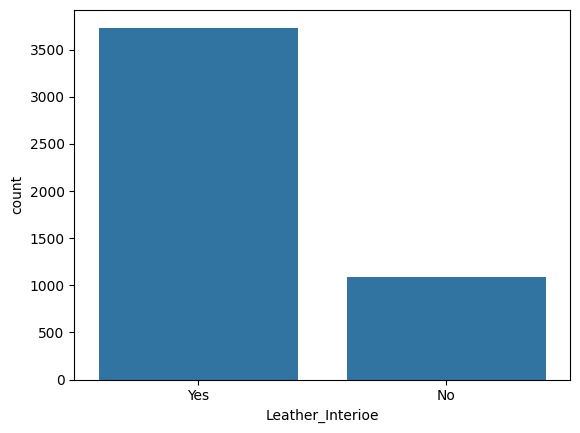

In [9]:
sns.countplot(x='Leather_Interioe', data = df)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4819 entries, 0 to 4818
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 4819 non-null   int64  
 1   Manufacturer       4819 non-null   object 
 2   Model              4819 non-null   object 
 3   Prod_Year          4819 non-null   int64  
 4   Category           4819 non-null   object 
 5   Leather_Interioe   4819 non-null   object 
 6   Fuel_Type          4819 non-null   object 
 7   Engine Volume      4819 non-null   object 
 8   Kilometers_Driven  4733 non-null   float64
 9   Gear_Box_Type      4819 non-null   object 
 10  Drive_Wheel        4819 non-null   object 
 11  Selling_Date       4819 non-null   object 
 12  Wheel              4819 non-null   object 
 13  Color              4819 non-null   object 
 14  Airbags            4650 non-null   float64
 15  Price              4819 non-null   int64  
dtypes: float64(2), int64(3),

In [11]:
df['Kilometers_Driven'] = df['Kilometers_Driven'].fillna(df['Kilometers_Driven'].mean())

In [12]:
df['Airbags'] = df['Airbags'].fillna(df['Airbags'].mean())

In [13]:
df.describe()

,Id,Prod_Year,Kilometers_Driven,Airbags,Price
count,4.819000e+03,4819.00000,4.819000e+03,4819.000000,4.819000e+03
mean,4.562941e+07,2011.30110,1.708417e+06,6.772688,2.181001e+05
std,6.639721e+05,5.43882,5.061310e+07,3.842983,1.911478e+05
min,2.813594e+07,1943.00000,1.600000e+03,0.000000,2.038000e+04
25%,4.572981e+07,2010.00000,7.400000e+04,4.000000,1.003600e+05
50%,4.577619e+07,2012.00000,1.260000e+05,6.000000,1.724900e+05
75%,4.580211e+07,2015.00000,1.876470e+05,12.000000,2.728400e+05
max,4.581665e+07,2020.00000,2.147484e+09,16.000000,2.885210e+06


In [14]:
uv, lv = np.percentile(df['Kilometers_Driven'],[99,1]);
print(uv,lv)

1708417.4331290936 6836.0


In [15]:
df[df['Kilometers_Driven']>uv]

,Id,Manufacturer,Model,Prod_Year,Category,Leather_Interioe,Fuel_Type,Engine Volume,Kilometers_Driven,Gear_Box_Type,Drive_Wheel,Selling_Date,Wheel,Color,Airbags,Price
66,45787171,MERCEDES-BENZ,Vito,1999,Minivan,No,Diesel,2.3,5.555551e+06,Manual,Front,02-03-2023,Left wheel,White,1.0,62720
649,45807165,OPEL,Vectra,1997,Sedan,No,CNG,1.6,7.777778e+08,Automatic,Front,04-05-2023,Left wheel,Beige,2.0,27000
735,44615609,BMW,525,2003,Sedan,Yes,Petrol,2.5,7.777787e+06,Manual,Rear,04-05-2023,Left wheel,Silver,10.0,134850
881,45814878,BMW,328,2002,Sedan,No,Petrol,2.8,5.555666e+07,Manual,Rear,04-05-2023,Left wheel,Silver,6.0,90950
1104,45775009,MERCEDES-BENZ,230,1996,Sedan,No,CNG,2.3,4.000000e+06,Automatic,Rear,04-05-2023,Left wheel,Green,4.0,62720
1162,45785610,MERCEDES-BENZ,C 180,1997,Sedan,No,Petrol,1.8,1.111111e+07,Manual,Rear,04-05-2023,Left wheel,Silver,2.0,72130
1410,45346940,VOLKSWAGEN,Golf,1999,Sedan,No,Petrol,1.6,2.147484e+09,Manual,Front,04-05-2023,Left wheel,Black,4.0,68990
1539,45543938,BMW,X5,2005,Jeep,Yes,Petrol,4.4,7.789999e+06,Automatic,Rear,04-05-2023,Left wheel,Brown,0.0,156810
2381,45770824,HONDA,Civic,2008,Sedan,No,Hybrid,1.3,2.432000e+06,Tiptronic,Front,04-05-2023,Left wheel,Grey,4.0,131720
3301,45790905,NISSAN,X-Terra,2004,Jeep,No,CNG,3.3,1.000000e+09,Tiptronic,4x4,05-05-2023,Left wheel,Black,8.0,125440


In [16]:
df[df['Kilometers_Driven']>3*uv] = 3*uv

C:\Users\HP\AppData\Local\Temp\ipykernel_18516\2963823328.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5125252.299387281' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df[df['Kilometers_Driven']>3*uv] = 3*uv
C:\Users\HP\AppData\Local\Temp\ipykernel_18516\2963823328.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5125252.299387281' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df[df['Kilometers_Driven']>3*uv] = 3*uv
C:\Users\HP\AppData\Local\Temp\ipykernel_18516\2963823328.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5125252.299387281' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df[df['Kilometers

In [17]:
df[df['Kilometers_Driven']<.3*lv] = .3*lv

In [18]:
uv, lv = np.percentile(df['Airbags'],[99,1]);
print(uv,lv)

16.0 0.0


In [19]:
df[df['Airbags']>3*uv] = 3*uv

In [20]:
df[df['Airbags']<0.3*lv] = .3*lv

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4819 entries, 0 to 4818
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 4819 non-null   float64
 1   Manufacturer       4819 non-null   object 
 2   Model              4819 non-null   object 
 3   Prod_Year          4819 non-null   float64
 4   Category           4819 non-null   object 
 5   Leather_Interioe   4819 non-null   object 
 6   Fuel_Type          4819 non-null   object 
 7   Engine Volume      4819 non-null   object 
 8   Kilometers_Driven  4819 non-null   float64
 9   Gear_Box_Type      4819 non-null   object 
 10  Drive_Wheel        4819 non-null   object 
 11  Selling_Date       4819 non-null   object 
 12  Wheel              4819 non-null   object 
 13  Color              4819 non-null   object 
 14  Airbags            4819 non-null   float64
 15  Price              4819 non-null   float64
dtypes: float64(5), object(11

In [22]:
df.describe(include=['O'])

,Manufacturer,Model,Category,Leather_Interioe,Fuel_Type,Engine Volume,Gear_Box_Type,Drive_Wheel,Selling_Date,Wheel,Color
count,4819,4819,4819,4819,4819,4819,4819,4819,4819,4819,4819
unique,52,683,5,3,5,87,4,4,4,3,17
top,HYUNDAI,Sonata,Sedan,Yes,Petrol,2,Automatic,Front,04-05-2023,Left wheel,Black
freq,1292,403,2807,3725,2649,1253,3353,3207,2580,4555,1310


In [23]:
df = df.drop(labels = ['Manufacturer','Model','Engine Volume','Color'] ,axis= 1)

In [24]:
df = pd.get_dummies(df, drop_first='true')

In [25]:
df.columns

Index(['Id', 'Prod_Year', 'Kilometers_Driven', 'Airbags', 'Price',
       'Category_Cabriolet', 'Category_Jeep', 'Category_Minivan',
       'Category_Sedan', 'Leather_Interioe_No', 'Leather_Interioe_Yes',
       'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Hybrid',
       'Fuel_Type_Petrol', 'Gear_Box_Type_Automatic', 'Gear_Box_Type_Manual',
       'Gear_Box_Type_Tiptronic', 'Drive_Wheel_4x4', 'Drive_Wheel_Front',
       'Drive_Wheel_Rear', 'Selling_Date_02-03-2023',
       'Selling_Date_04-05-2023', 'Selling_Date_05-05-2023',
       'Wheel_Left wheel', 'Wheel_Right-hand drive'],
      dtype='object')